# Defining "del" operator ($\nabla$)



The "del" operator is defined to be: 
$\large \nabla = \bf{i}\frac{\partial}{\partial x} + \bf{j}\frac{\partial}{\partial y} + \bf{k}\frac{\partial}{\partial z}$

This is the same in 2D, only we ommit the $\bf{k}$ term

# Defining the Divergence ("div") of a vector field ($\bf{F}$) 

$div\bf{F}$, or $\large \nabla \cdot \bf{F}$, is the dot product of del with $\bf{F}$. 

Now, if $\bf{F}=\langle P,Q,R \rangle$ then 
$${div} \bf{F}=\nabla \cdot \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \cdot \langle P,Q,R \rangle$$
$$= \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z}$$

This means $div\bf{F}$ is a scalar


# Defining the Curl of a Vector field ($\bf{F}$)

$curl\bf{F}$, or $\nabla \times \bf{F}$, is the cross product of del with $\bf{F}$.

Using the same vector field as above, 
$$curl\bf{F} = \nabla \times \bf{F} = \big\langle \frac{\partial}{\partial x},\frac{\partial}{\partial y},\frac{\partial}{\partial z} \big\rangle \times \langle P,Q,R \rangle = \begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\ \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & \frac{\partial}{\partial z} \\ P & Q & R \end{vmatrix} $$


$$= \bigg( \frac{\partial R}{\partial y} - \frac{\partial Q}{\partial z} \bigg)\bf{i} + \bigg( \frac{\partial P}{\partial z} - \frac{\partial R}{\partial x} \bigg)\bf{j} + \bigg( \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \bigg)\bf{k}$$

For the 2D cross product (i.e. $\bf{F}=\langle P,Q \rangle$) we get,
$$curl\bf{F}=\begin{vmatrix} \bf{i} & \bf{j} & \bf{k} \\  \frac{\partial}{\partial x} & \frac{\partial}{\partial y} & 0 \\ P & Q & 0 \end{vmatrix} = \bigg( \frac{\partial P}{\partial y} - \frac{\partial Q}{\partial x} \bigg)\bf{k}$$

This means $curl\bf{F}$ a vector.

--------------------------------------------------

# Plotting Divergence and Curl Functions

- Hand write the expressions for f_div/curl 
- Compute the (u,v) values for few points for f_div/curl
- Compute Curl and Div at same points for f_div/curl

-- Check code to hand computations
 
pick function wiht non-const, non-0 div (write out by hand) -> check value at (1,2) and (2,1)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn
seaborn.set_style('white')  # noqa: E402
seaborn.set_context("poster")  # noqa: E402


### For the Divergent function
If $\bf{F}=(x^2)\hat{i}+(y^2)\hat{j}$, 

then $\nabla \cdot \bf{F} = 2x+2y$, and $\nabla \times \bf{F} =0$
### For the Curl function
If $\bf{F}=(y^2)\hat{i}+(x^2)\hat{j}$, 

then $\nabla \times \bf{F} = 2(y-x)\hat{k}$, and $\nabla \cdot \bf{F} =0$

In [75]:
def f_div(x,y):
    '''
    Function with non-zero divergence everywhere and zero curl
    '''
    u = x**2
    v = y**2
    return u,v

def f_curl(x,y):
    '''
    Function with non-zero Curl everywhere and zero divergence
    '''
    u = y**2
    v = x**2
    return u,v

In [123]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def colorbar(mappable):
    """Create a colorbar that obeys tight_layout, etc.

    Stolen from: http://joseph-long.com/writing/colorbars/

    Parameters
    ----------
    mappable
        Return value from e.g. `matplotlib.imshow()` or `matplotlib.scatter()`.
    """
    try:
        # QuadContourSet is not a Artist, so doesn't have `axes`
        ax = mappable.axes
    except AttributeError:
        ax = mappable.ax
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
     
    return fig.colorbar(mappable, cax=cax)

basic_cols=['#ff0000', '#303030', '#0099ff']
blue_to_red=LinearSegmentedColormap.from_list('mycmap', basic_cols)

def div_field(x, y):
    u,v = f_div(x,y)
    U,V = np.meshgrid(np.gradient(u),np.gradient(v))
    plt.title("Divergent Vector Field")
    plt.quiver(x, y, U, V, cmap=blue_to_red, pivot='mid')
    plt.show()
    return U,V
    
def curl_field(x, y):
    u,v = f_curl(x,y)
    U,V = np.meshgrid((u),(v))
    plt.title("Curl Vector Field")
    plt.quiver(x, y, U, V, cmap=blue_to_red, pivot='mid')
    plt.show()
    
def calc_div(x, y):
    u,v = f_div(x,y)
    uDel = (np.gradient(u))
    vDel = (np.gradient(v))
    divergence = uDel+vDel #dudx+dvdy
    return divergence

def calc_curl(x,y):
    u,v = f_curl(x,y)
    uDel = (np.gradient(u))
    vDel = (np.gradient(v))
    curl = vDel[0]-uDel[1] #dudy-dvdx
    return curl

def plot_div(x, y, dot_size):
    divergence = calc_div(x,y)
    #plt.figure(figsize=(10,10))
    plt.title('Divergence')
    div_plot = plt.scatter(x, y, c=divergence, s=dot_size, cmap=blue_to_red)
    
    colorbar(div_plot);
    
def plot_curl(x, y, dot_size):
    curl = calc_curl(x,y)
    #plt.figure(figsize=(10,10))
    plt.title('Curl')
    curl_plot = plt.scatter(x, y, c=curl.flatten(), s=dot_size, cmap=blue_to_red)

    colorbar(curl_plot);

C:\Users\hsham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\hsham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


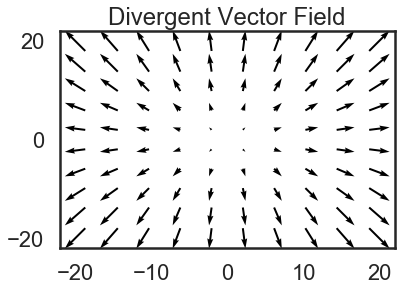

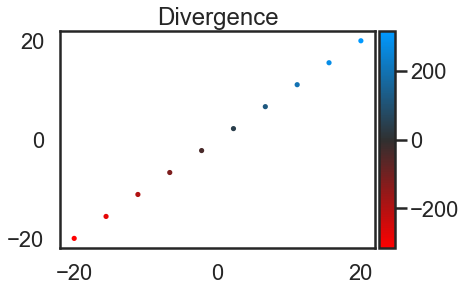

In [124]:
n = 20
x = np.linspace(-n, n, n/2)
y = np.linspace(-n, n, n/2)

div_field(x,y)
plot_div(x,y,dot_size=10)